In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns

In [2]:
df= pd.read_csv("C:/Users/Cemo/Desktop/Panteon - Game Data Analyst - EVENTS.csv")

In [3]:
# Just Basic Looking
df.head()

,EVENT_DATE,EVENT_NAME,USER_ID,CHAPTER,RESULT,REASON,SOURCE,AMOUNT,GAME_MODE,NAME
0,2023-09-03,CurrencyEarned,247259373,NaN,NaN,NaN,DailyFree,30.0,NaN,NaN
1,2023-09-03,ChapterProgress,298339933,3.0,0.0,NaN,NaN,NaN,Normal,NaN
2,2023-09-05,CurrencyEarned,246407236,NaN,NaN,NaN,Achievements,10.0,NaN,NaN
3,2023-09-05,ChapterStarted,297123727,18.0,NaN,NaN,NaN,NaN,Normal,NaN
4,2023-09-06,ChapterStarted,296425420,24.0,NaN,NaN,NaN,NaN,Hard,NaN


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
USER_ID,10000.0,2.718093e+08,2.073517e+07,240748227.0,250149628.0,274600804.0,2.945416e+08,298586590.0
CHAPTER,4000.0,2.037400e+01,3.178030e+01,1.0,7.0,15.0,2.400000e+01,255.0
RESULT,2000.0,3.180000e-01,4.658159e-01,0.0,0.0,0.0,1.000000e+00,1.0
AMOUNT,1998.0,4.039089e+01,1.038596e+02,1.0,20.0,25.0,3.600000e+01,2680.0


In [5]:
win_fail_df = df[(df["EVENT_NAME"] == "ChapterProgress") & (df["RESULT"].notna()) & (df["GAME_MODE"].notna())].copy()

In [6]:
win_fail_df["EVENT_DATE"] = pd.to_datetime(win_fail_df["EVENT_DATE"])

In [7]:
win_fail_summary = win_fail_df.groupby(["EVENT_DATE", "GAME_MODE"]).agg(
    total_wins=("RESULT", lambda x: (x == 1).sum()),
    total_fails=("RESULT", lambda x: (x == 0).sum()),
    total_games=("RESULT", "count")
).reset_index()

In [8]:
win_fail_summary["win_rate"] = (win_fail_summary["total_wins"] / win_fail_summary["total_games"]) * 100
win_fail_summary["fail_rate"] = (win_fail_summary["total_fails"] / win_fail_summary["total_games"]) * 100

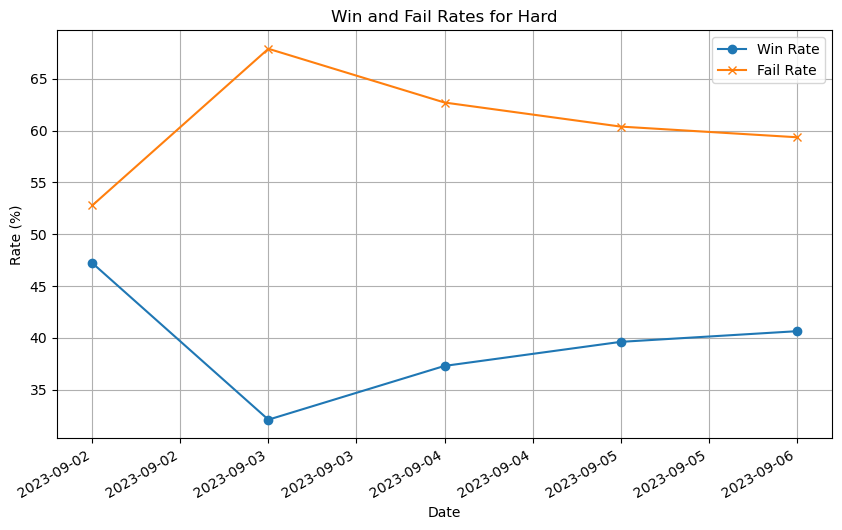

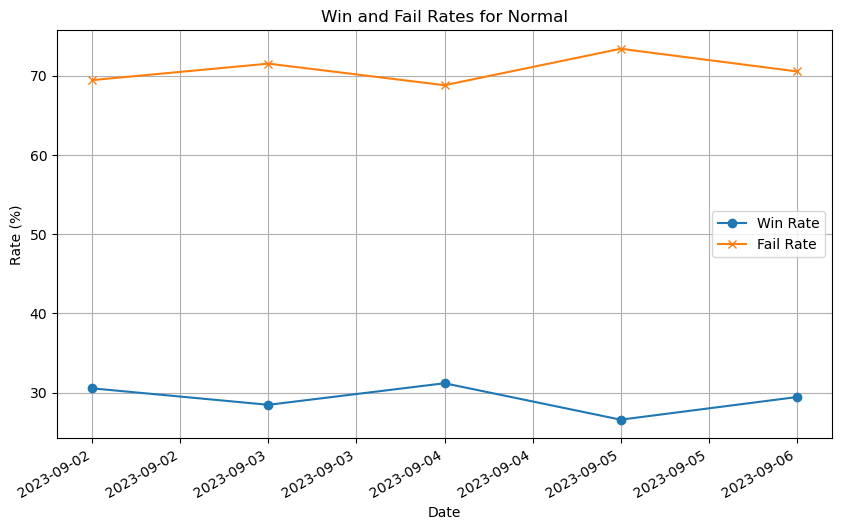

In [9]:
for game_mode in win_fail_summary["GAME_MODE"].unique():
    subset = win_fail_summary[win_fail_summary["GAME_MODE"] == game_mode]
    plt.figure(figsize=(10, 6))
    plt.plot(subset["EVENT_DATE"], subset["win_rate"], label="Win Rate", marker="o")
    plt.plot(subset["EVENT_DATE"], subset["fail_rate"], label="Fail Rate", marker="x")
    plt.title(f"Win and Fail Rates for {game_mode}")
    plt.xlabel("Date")
    plt.ylabel("Rate (%)")
    plt.legend()
    plt.grid(True)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
    plt.gcf().autofmt_xdate() 
    plt.show()

In [10]:
currency_df = df[(df["EVENT_NAME"] == "CurrencyEarned") | (df["EVENT_NAME"] == "CurrencySpent")]

In [11]:
gem_earned_df = currency_df[currency_df["EVENT_NAME"] == "CurrencyEarned"]
gem_spent_df = currency_df[currency_df["EVENT_NAME"] == "CurrencySpent"]

In [12]:
gem_earned_summary = gem_earned_df.groupby("SOURCE").agg(
    total_earned=("AMOUNT", "sum")
).reset_index()
gem_earned_summary["percentage_earned"] = (gem_earned_summary["total_earned"] / gem_earned_summary["total_earned"].sum()) * 100

In [13]:
gem_spent_summary = gem_spent_df.groupby("REASON").agg(
    total_spent=("AMOUNT", "sum")
).reset_index()
gem_spent_summary["percentage_spent"] = (gem_spent_summary["total_spent"] / gem_spent_summary["total_spent"].sum()) * 100

In [14]:
gem_earned_summary["Type"] = "Earning"
gem_spent_summary["Type"] = "Spending"

In [15]:
gem_earned_summary = gem_earned_summary.rename(columns={"SOURCE": "Category", "total_earned": "Amount", "percentage_earned": "Percentage"})
gem_spent_summary = gem_spent_summary.rename(columns={"REASON": "Category", "total_spent": "Amount", "percentage_spent": "Percentage"})

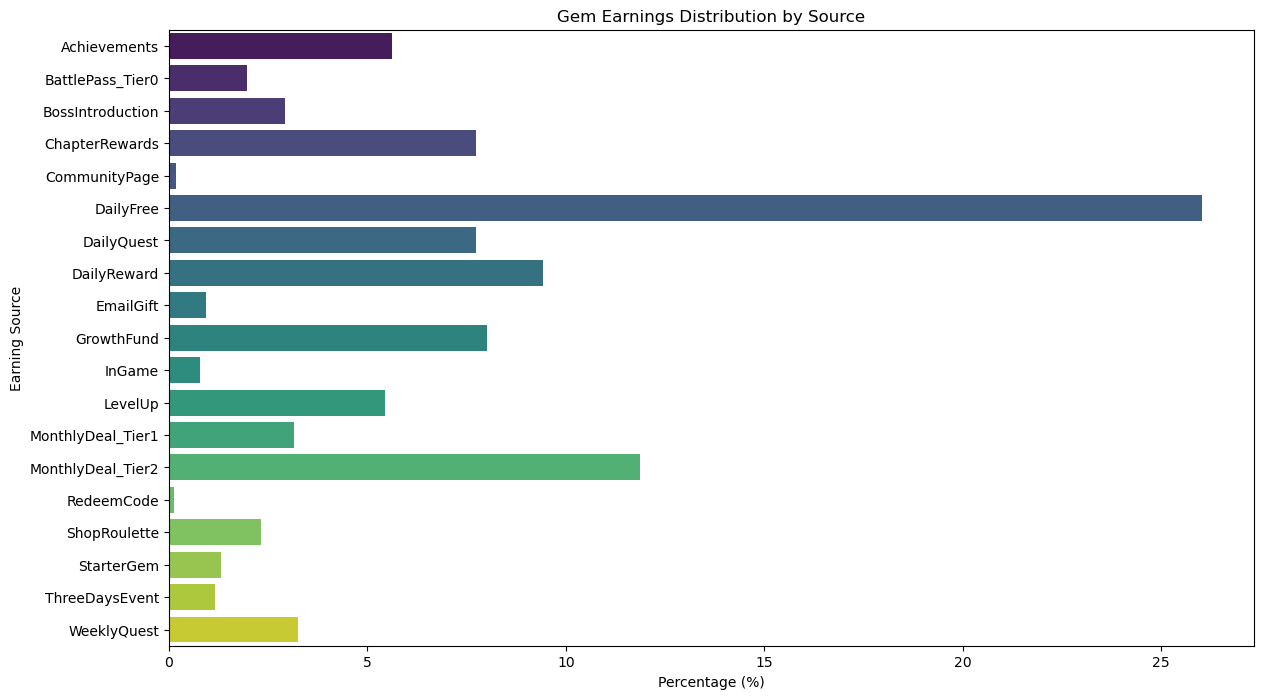

In [16]:
plt.figure(figsize=(14, 8))
sns.barplot(data=gem_earned_summary, x="Percentage", y="Category", palette="viridis")
plt.title("Gem Earnings Distribution by Source")
plt.xlabel("Percentage (%)")
plt.ylabel("Earning Source")
plt.show()

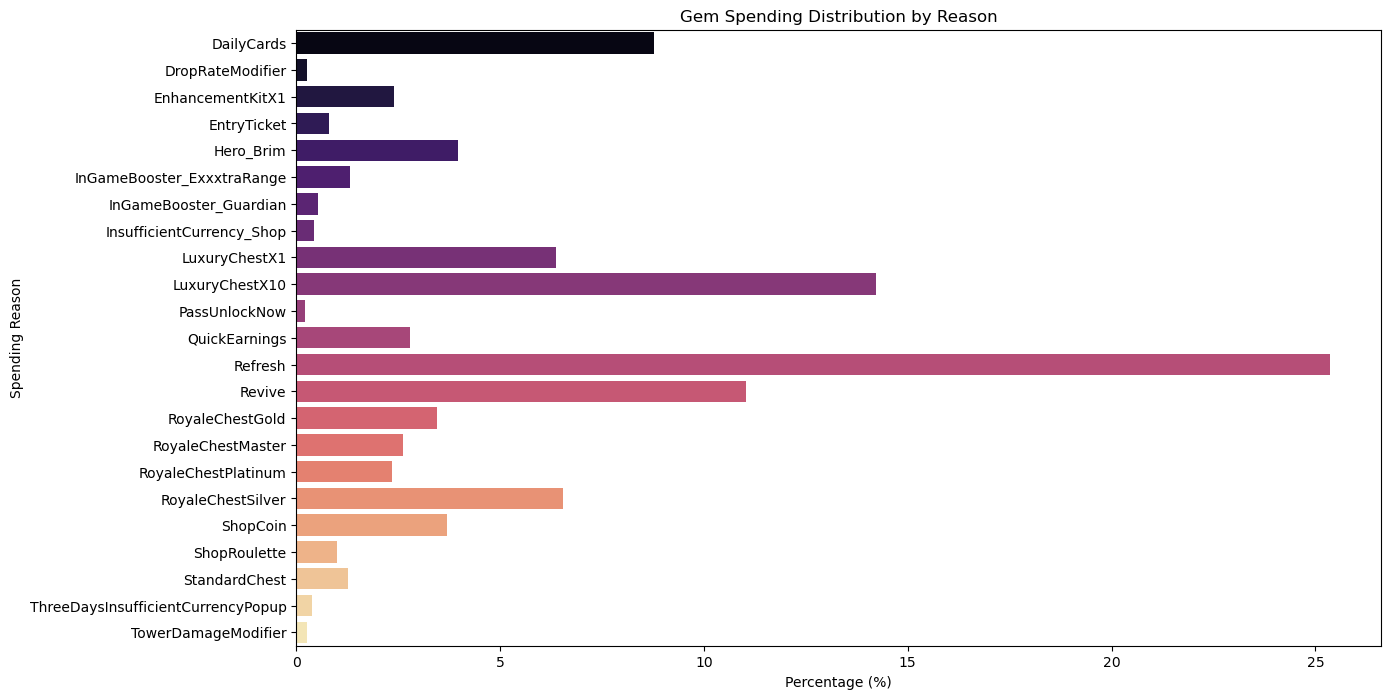

In [17]:
plt.figure(figsize=(14, 8))
sns.barplot(data=gem_spent_summary, x="Percentage", y="Category", palette="magma")
plt.title("Gem Spending Distribution by Reason")
plt.xlabel("Percentage (%)")
plt.ylabel("Spending Reason")
plt.show()